# Determinig names of our actors and actresses

In [1]:
## Standard stuff:
import numpy as np, seaborn as sns, pandas as pd
## For text classification:
import nltk, nltk.sentiment, sklearn
%matplotlib inline
import random 
from nltk.corpus import names 
import nltk 
import random
import pandas as pd

In [2]:
df = pd.read_csv('movie.csv')

In [3]:
from nltk.tokenize import TweetTokenizer 

token = nltk.tokenize.TweetTokenizer()

def preprocessing(string): 
    v1 = string.lower()
    v2 = token.tokenize(v1)
    
    return v2

def preprocessing_full(string): 
    v1 = string.lower()
    v2 = v1[:-2].strip()
    return v2

In [4]:
#nltk.download('names')
#name = nltk.corpus.names

#name.fileids()

In [5]:
#female_names = name.words('female.txt')
#male_names = name.words('male.txt')

#female = set([x.lower() for x in female_names])
#male = set([x.lower() for x in male_names])

#test = []
#for i in range(10000): 
#    if (df['female'] ==1 & df['male'] == 1) & (df['Female actor'] == 'Nan') & df['Male actor'] == 1: 
#        v1 = 'M'
#if df['female'] == 0 & df['male'] == 1 & df['Female actor'] == 'Nan' & df['Male actor'] == 1: 
#        v1 = 'M'
#    v1 = df['female'][i] != df['Female actor'][i]
#    test.append(v1)

# Reading and converting female first names

In [6]:
with open('all_female.txt') as f:
    actresses = f.read()
    
all_female= [] 
for i in range(0,5127): 
    if i == 0: 
        v1 = actresses.split(',')[i].strip()[2:-1]
        all_female.append(v1)
    else: 
        v2 = actresses.split(',')[i].strip()[1:-1]
        all_female.append(v2)

In [7]:
female = [x.lower() for x in all_female]

female_set = set(female)
print(len(female_set))
len(female)

5124


5127

## Reading and converting full female actress names 

In [19]:
with open('female_name.txt') as f:
    female_full_name = f.read()
    
actresses_fn = [] 
for i in range(0,606): 
    if i == 0: 
        v1 = female_full_name.split(',')[i].strip()[2:-1]
        actresses_fn.append(v1)
    else: 
        v2 = female_full_name.split(',')[i].strip()[1:-1]
        actresses_fn.append(v2)

In [22]:
actresses = [x.lower() for x in actresses_fn]

actresses_set = set(actresses)
print(len(actresses_set))
len(actresses)

605


606

# Reading and converting male names


In [25]:
with open('all_male.txt') as f:
    actors = f.read()
    
all_male= [] 
for i in range(0,3049): 
    if i == 0: 
        v1 = actors.split(',')[i].strip()[2:-1]
        all_male.append(v1)
    else: 
        v2 = actors.split(',')[i].strip()[1:-1]
        all_male.append(v2)

In [14]:
male = [x.lower() for x in all_male]
male_set = set(male)

## Reading and converting full male actors names 

In [29]:
with open('male_name.txt') as f:
    male_full_name = f.read()
    
actors_fn = [] 
for i in range(0,606): 
    if i == 0: 
        v1 = male_full_name.split(',')[i].strip()[2:-1]
        actors_fn.append(v1)
    else: 
        v2 = male_full_name.split(',')[i].strip()[1:-1]
        actors_fn.append(v2)
        
actors_fn[0]

'Vera Chytilová'

In [30]:
actors = [x.lower() for x in actors_fn]

actors_set = set(actors)
print(len(actors_set))
#actors.index('tim robbins')
actors[0]

100


'vera chytilová'

In [15]:
data = df['Top Star'].apply(preprocessing)
data1 = df['Top Star'].apply(preprocessing_full)
data1.head()

data1.loc[0]

'tim robbins'

In [ ]:
def count_dictionary(dictornary, document):
    filtered_doc = [x for x in document if x in dictonary]
    return len(filtered_doc)#, filtered_doc


In [45]:
#df['female'] = data.apply(count_dictionary, dictonary = female_set)
#df['male'] = data.apply(count_dictionary, dictonary = male_set)
#df['female_2'] =data1.apply(count_dictionary, dictonary = actresses_set)
#df['male_2'] =data1.apply(count_dictionary, dictonary = actors_set)

# LOOKS UP IF NAME IN DF IS ON FULL NAME ACTORS LIST 
male_actor = []
for i in range(10000): 
    if (data1.loc[i] in actors): 
        v1 = 1
        male_actor.append(v1)
    else: 
        v2 = 0
        male_actor.append(v2)
        
df['Male_actor'] = pd.DataFrame(male_actor)

# LOOKS UP IF NAME IN DF IS ON FULL NAME ACTORESS LIST 
female_actor = []
for i in range(10000): 
    if (data1.loc[i] in actresses): 
        v1 = 1
        female_actor.append(v1)
    else: 
        v2 = 0
        female_actor.append(v2)
        
df['Female_actor'] = pd.DataFrame(female_actor)

NameError: name 'data1' is not defined

In [43]:
df.head(1)

,Unnamed: 0,Title,Year,Genre,Rating,Gross,Director,Summary,Top Star,Star 2,Star 3,Star 4
0,0,En verden udenfor,1994,Drama,9.3,$28.34M,Frank Darabont,Two imprisoned men bond over a number of years...,"Tim Robbins,","Morgan Freeman,","Bob Gunton,",William Sadler


In [44]:
# MAKES A COLUMN THAT INDICATES WETHER A GENDER HAS BEEN ASSIGNED 
df['test'] = df.apply(lambda row: row.Female_actor + row.Male_actor, axis=1)
# IF 'test'==0 NO GENDER HAS BEEN ASSIGNED 
df.loc[df.test ==0, 'test'].count()

AttributeError: ("'Series' object has no attribute 'Female_actor'", 'occurred at index 0')

In [88]:
#SELECTING THE ROWS THAT ARE NOT YET ASSIGNED A GENDER
df_ng = df.loc[(df['test'] == 0)]
df_ng

#ASSIGNS GENDER TO THESE ROWS
df_ng['female'] = data.apply(count_dictionary, dictonary = female_set)
df_ng['male'] = data.apply(count_dictionary, dictonary = male_set)

#GENERATES LISTS THAT INDICATE HOW MANY ROWS HAVE NOT BEEN ASSIGNED GENDER 
#OR HAS BEEN A ASSIGNED MULTIPLE GENDERS
sure_male = df_ng.loc[(df_ng['female']==0) & (df_ng['male']>=1)]
sure_female = df_ng.loc[(df_ng['female']>=1)&(df_ng['male']==0)]
neutral_gender = df_ng.loc[(df_ng['female']>=1)&(df_ng['male']>=1)]
no_gender = df_ng.loc[(df_ng['female']==0)&(df_ng['male']==0)]

print(sure_male['male'].count()) #NUMBER OG ROWS THAT ARE UNIQUELY IDENTIFIED AS MALE
print(sure_female['male'].count()) #NUMBER OG ROWS THAT ARE UNIQUELY IDENTIFIED AS FEMALE
print(neutral_gender['male'].count()) #NUMBER OG ROWS THAT ARE IDENTIFIED AS BOTH MALE AND FEMALE
print(no_gender['male'].count()) #NUMBER OG ROWS WITH NO ASSIGNED GENDER


2134
636
1069
1351


/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [89]:
#DEFINE DATAFRAME WITH ONLY THE OBSERVATIONS THAT WERE IDENTIFYED BY FULL NAME 
df_true = df.drop(df[df.test == 0].index)

len(df_true)

4810

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

#GENERATE DATASET WITH ONLY FEMALES AND YEAR 

#year_male = df_gender.groupby(['Year'])['Male_actor'].size()
year_female = df_true.groupby(['Female_actor', 'Year']).size()#.drop(df_true[df_true.Female_actor == 0].index)
#year_female1 = df.drop(df[df.Female_actor==0].index)
                               #'Rating', 'Gross', 'Director','Summary', /
                               #'Top Star', 'Star 2', 'Star 3', 'Star 4']
male = year_female[0]
female = year_female[1]
f = pd.DataFrame(female)
m = pd.DataFrame(male)

merge = pd.merge(f,m, on = 'Year')
merge.columns = [['female','male']]

#data = merge.iloc[]
data2 = merge.reset_index()

df = data2.drop(data2['Year'], axis = 1)
df['result'] = ''
df['result'] = df.sum(1)

data = pd.DataFrame(df)
#df['percent'] = ''
#df[["female", "male"]] = df[["female", "male"]].apply(pd.to_numeric)
#df['percent'] = df['female']

In [190]:
female_list = list(df['female'].values.flatten())
male_list = list(df['male'].values.flatten())
result_list = list(df['result'].values.flatten())

percent_female = []
for i in range(40): 
    v = round(female_list[i]/result_list[i]*100, 0)
    percent_female.append(v)
    
percent_male = []
for i in range(40): 
    v = round(male_list[i]/result_list[i]*100, 0)
    percent_male.append(v)

In [203]:
df_fp = pd.DataFrame(percent_male)
df_mp = pd.DataFrame(percent_female)

df2 = pd.merge(df_fp, df_mp, left_index=True, right_index=True)
df2.columns= [['male percent', 'female percent']]

df3 = pd.merge(df, df2, left_index = True, right_index = True)
df3.head()

,female,male,result,male percent,female percent
0,8,35,43,81.0,19.0
1,5,29,34,85.0,15.0
2,7,34,41,83.0,17.0
3,7,40,47,85.0,15.0
4,7,41,48,85.0,15.0


In [285]:
female = percent_female[:39]
male = percent_male[:39]
r = list(range(1980,2020))
len(r)

40

ValueError: shape mismatch: objects cannot be broadcast to a single shape

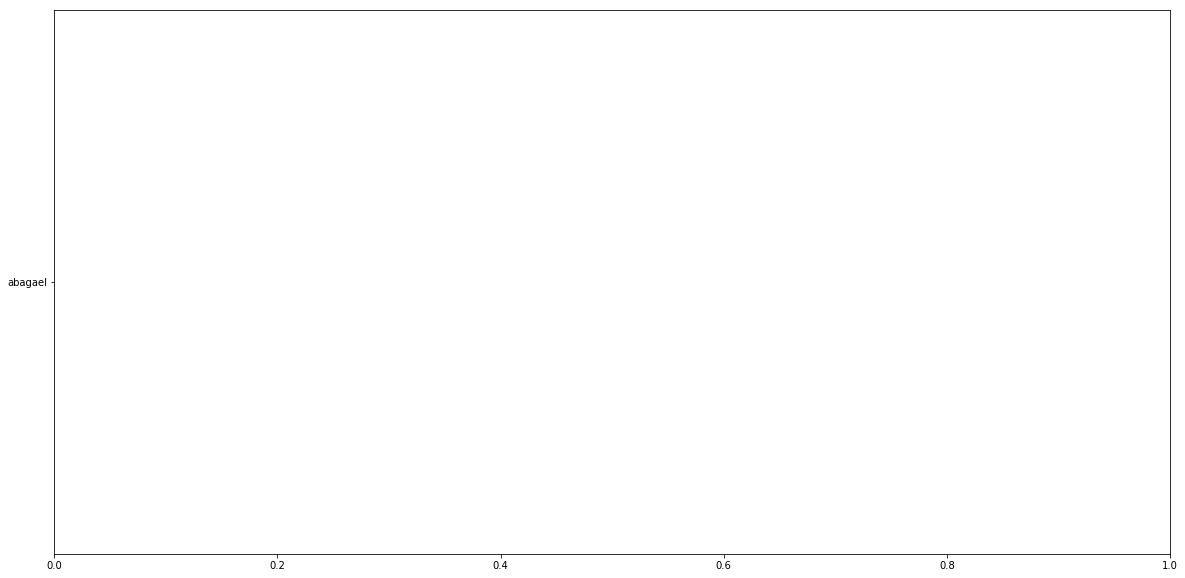

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# Data
r = list(range(39))

# plot
barWidth = 0.85
names = list(range(39))
plt.figure(figsize=(20,10))
# Create PFHxA Bars
plt.bar(r, female, color='#FF9904', edgecolor='white', width=barWidth, 
label="female")
# Create PFHpA Bars
plt.bar(r, male, bottom=female, color='#FDDB5E', edgecolor='white', 
width=barWidth, label="male")


# Custom x axis
plt.xticks(r, names)
plt.xlabel("Years")

# Custom y axis
plt.ylabel("Percent")

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic